# 📊 Data-Driven Insights into Retail Inventory and Sales Performance Using Statistical Analysis

*****NAME: Prakruthi BR*****

*****REGISTRATION NO. : 2411021240038*****

**GITHUB REPOSITORY LINK:** https://github.com/prakruthidevanga/Data-Driven-Insights-into-Retail-Inventory-and-Sales-Performance-Using-Statistical-Analysis

# 📚 Table of Contents
Welcome to the project notebook! Below is the structured flow of analysis covered in this project.

1. 📘 [Project Title and Info](#project-title-and-info)
2. 🧾 [Project Overview](#project-overview)
3. 🎯 [Project Goal](#project-goal)
4. 🚧 [Challenges Faced](#challenges-faced)
5. 📦 [Import Libraries & Load Dataset](#import-libraries--load-dataset)
6. 🧹 [Data Preprocessing](#data-preprocessing)
7. 📊 [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
8. 🔍 [Univariate and Multivariate Analysis](#univariate-and-multivariate-analysis)
9. 🎲 [Probability & Hypothesis Testing](#probability--hypothesis-testing)
10. 📈 [Units Sold Prediction (Regression)](#Units-Sold-prediction-regression)
11. 📉 [Product Demand Classification (Categorical Analysis)](#product-demand-classification-categorical-analysis)
12. 📏 [Model Evaluation](#model-evaluation)
13. 🏁 [Final Conclusion](#final-conclusion)

# 📗Project Title and Info
## 📊 Data-Driven Insights into Retail Inventory and Sales Performance Using Statistical Analysis
In this project, we anaylze retail store and sales product using statistical methdos. The aim is to extract key insights from retail inventory and sales data to optimize inventory management and enhance the accuracy of sales forecasting.

## 🗒️Project Overview
This project explores a dataset containing Inventory levels, product categories, and sales trends. We apply Elementary Statistics to:
  
- Understand Inventory behavior patterns.
- Identify Units Sales across Seasons.
- Make analytical observation using hypothetist test, regression, and numerical analysis.

## 🎯Project goal
The main objective for this project are:
- Analyze inventory data and product distribution.
- Identify trends And Patterns in inventory over time.
- Use statistical tests to validate patterns and assumptions.- Assist businesses with actionable insights backed by dataa
- predict Sales Performance

## 🚧 Challenges Faced

- Incomplete or missing values in the dataset
- Imbalanced product category representation
- Outliers in numerical fields such as sales volume, inventory level, and price 
- Interpreting relationships between variables (like price & units sold)

## 📦 Import Libraries & Load Dataset

We begin by importing essential libraries and loading the dataset for further analysis.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, ttest_ind, chi2_contingency

In [4]:
#load the dataset...
dataset = pd.read_csv(r"C:\Users\prakr_rewvga6\OneDrive\Desktop\Excel\retail_store_inventory.csv")
dataset

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


## 🧹 Data Preprocessing

In this step, we:
- Handle missing values
- Remove duplicates
- convert inconsistent datatypes
- drop columns and rows

In [6]:
#checking the missing value
dataset.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [7]:
#droping the duplicate columns and rows
data=dataset.drop_duplicates()

In [8]:
# droping the coulmns 
df=dataset.drop(columns=["Store ID","Product ID"])

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
# making units_sold and price into neagtive values 
units=df[df["Units Sold"]>0]
price=df[df["Price"]>0]

In [11]:
df=df.drop_duplicates()

In [12]:
df=df[df["Region"]=="North"]

In [13]:
df.shape

(18228, 13)

In [14]:
#total items per category 
category_counts= df["Category"].value_counts()
category_counts

Category
Toys           3739
Furniture      3720
Groceries      3652
Electronics    3589
Clothing       3528
Name: count, dtype: int64

### ☝️it shows items of each category

In [16]:
df.columns

Index(['Date', 'Category', 'Region', 'Inventory Level', 'Units Sold',
       'Units Ordered', 'Demand Forecast', 'Price', 'Discount',
       'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing',
       'Seasonality'],
      dtype='object')

In [18]:
# Change the dataType 
df['Date']  = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].astype(int)
df['Demand Forecast'] = df['Demand Forecast'].astype(int)
df['Competitor Pricing']=df['Competitor Pricing'].astype(int)

#### ☝️ this is uesd to covert datatype 
- Date into datetime
- Price(float) into intger
- DemandForecast(float) into intger
- Cometitor Pricing(float) into intger

In [31]:
# split the date columns to day, month and year columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Day,Month
0,2022-01-01,Groceries,North,231,127,55,135,33,20,Rainy,0,29,Autumn,1,1
3,2022-01-01,Toys,North,469,61,164,62,32,10,Cloudy,1,34,Autumn,1,1
7,2022-01-01,Clothing,North,380,312,54,329,97,5,Cloudy,0,100,Spring,1,1
14,2022-01-01,Clothing,North,379,369,154,363,92,15,Snowy,0,95,Winter,1,1
15,2022-01-01,Electronics,North,363,255,69,255,21,5,Cloudy,1,20,Autumn,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73089,2024-01-01,Toys,North,308,184,94,186,19,0,Cloudy,0,22,Winter,1,1
73090,2024-01-01,Groceries,North,156,121,156,137,86,0,Snowy,1,87,Summer,1,1
73091,2024-01-01,Electronics,North,495,324,42,317,36,10,Sunny,0,38,Winter,1,1
73094,2024-01-01,Furniture,North,408,323,92,336,83,0,Sunny,0,80,Winter,1,1


In [33]:
# encoding the categorical data into numeric data 
lable=LabelEncoder()
df["Category"]=lable.fit_transform(df["Category"])
df["Region"]=lable.fit_transform(df["Region"])
df["Weather Condition"]=lable.fit_transform(df["Weather Condition"])
df["Seasonality"]=lable.fit_transform(df["Seasonality"])

#### ☝️ this cell shows us how to convert object dtype into intger using Lable Encoding:

- df["Category"] = lable. fit_transform (df["Category"])
- df["Region"]= lable. fit_transform (df["Region"])
- df["Weather Condition"] =lable. fit_transform (df["Weather Condition"])
- df["Seasonality"] =lable. fit_transform (df["Seasonality"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18228 entries, 0 to 73096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                18228 non-null  datetime64[ns]
 1   Category            18228 non-null  int32         
 2   Region              18228 non-null  int32         
 3   Inventory Level     18228 non-null  int64         
 4   Units Sold          18228 non-null  int64         
 5   Units Ordered       18228 non-null  int64         
 6   Demand Forecast     18228 non-null  int32         
 7   Price               18228 non-null  int32         
 8   Discount            18228 non-null  int64         
 9   Weather Condition   18228 non-null  int32         
 10  Holiday/Promotion   18228 non-null  int64         
 11  Competitor Pricing  18228 non-null  int32         
 12  Seasonality         18228 non-null  int32         
 13  Day                 18228 non-null  int32         


## 📊 Exploratory Data Analysis (EDA)

We explore trends and patterns using:
- Summary statistics
- Distribution plots
- Correlation heatmaps

In [40]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,18228,2022-12-30 23:38:25.990783488,2022-01-01 00:00:00,2022-07-01 00:00:00,2022-12-31 00:00:00,2023-07-02 00:00:00,2024-01-01 00:00:00,NaN
Category,18228.0,2.026607,0.0,1.0,2.0,3.0,4.0,1.411147
Region,18228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Inventory Level,18228.0,274.796632,50.0,163.0,274.0,387.0,500.0,129.793684
Units Sold,18228.0,136.32686,0.0,48.0,107.0,203.0,491.0,109.207022
Units Ordered,18228.0,109.593867,20.0,64.0,109.0,155.0,200.0,52.277075
Demand Forecast,18228.0,140.862629,-9.0,53.0,112.0,208.0,502.0,109.524282
Price,18228.0,54.823733,10.0,33.0,54.0,78.0,100.0,26.052071
Discount,18228.0,10.014264,0.0,5.0,10.0,15.0,20.0,7.096225
Weather Condition,18228.0,1.498409,0.0,1.0,1.0,2.0,3.0,1.114722


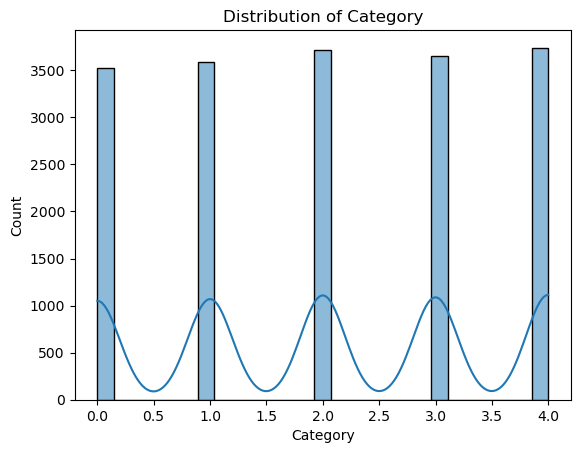

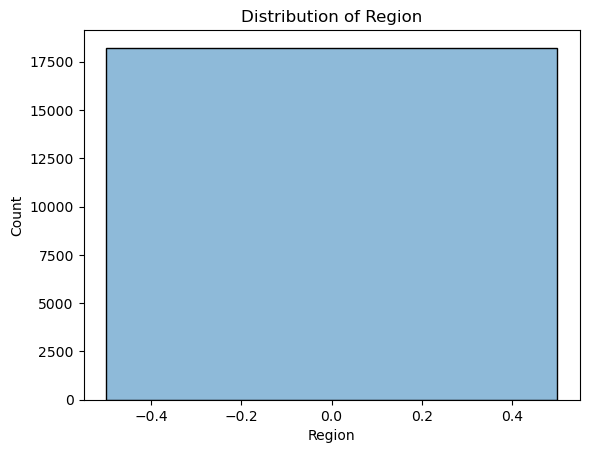

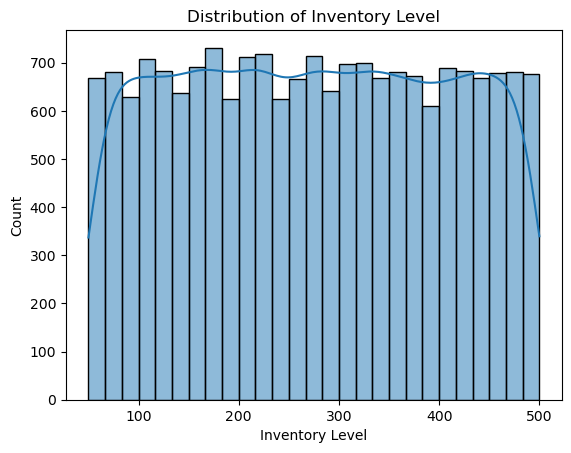

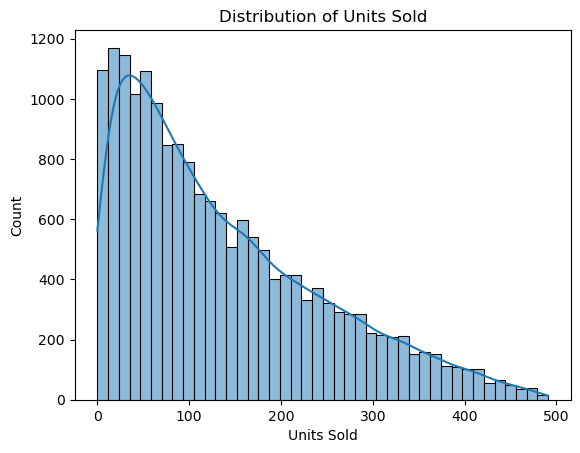

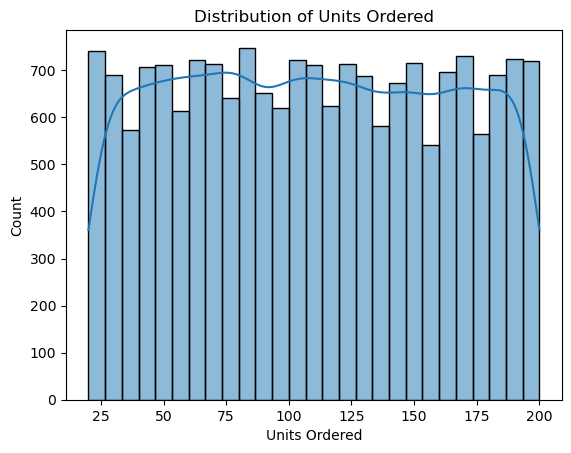

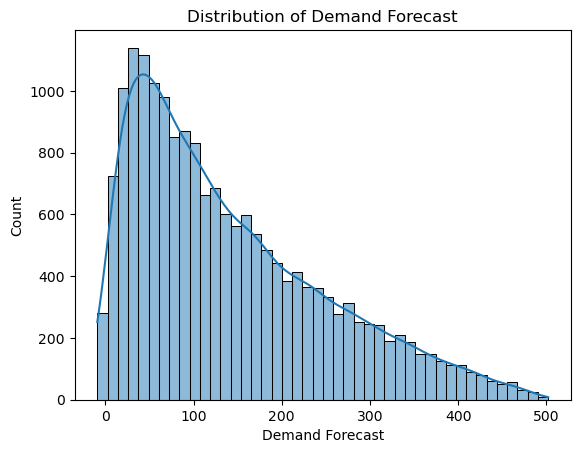

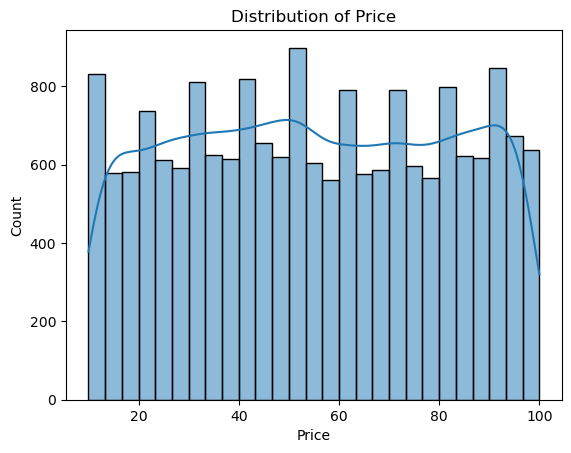

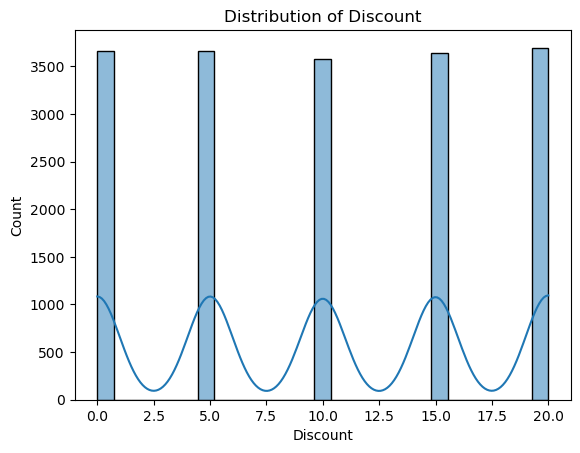

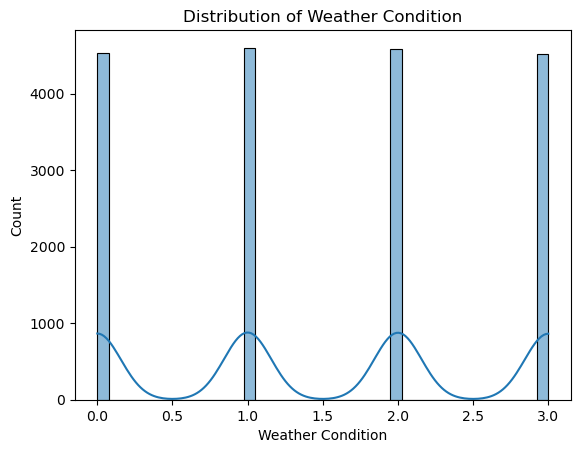

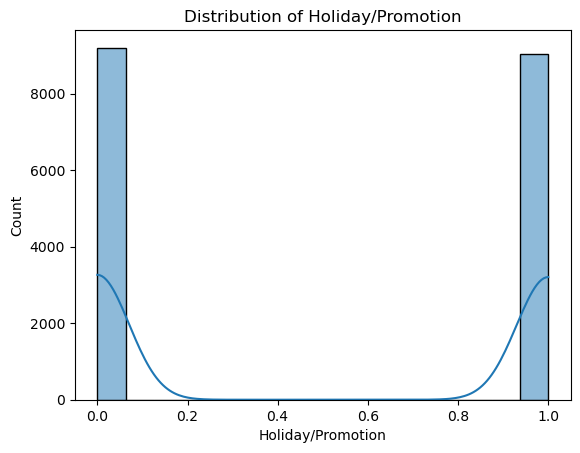

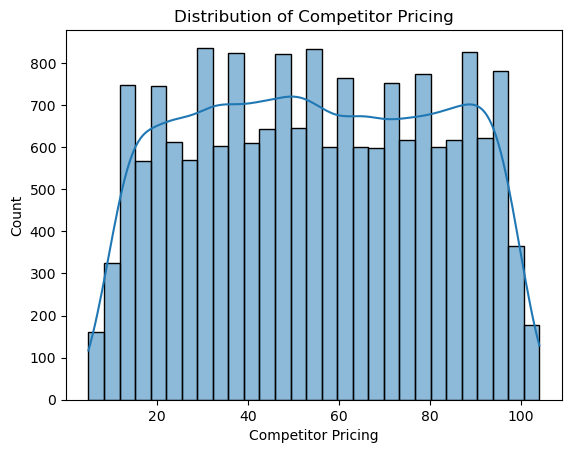

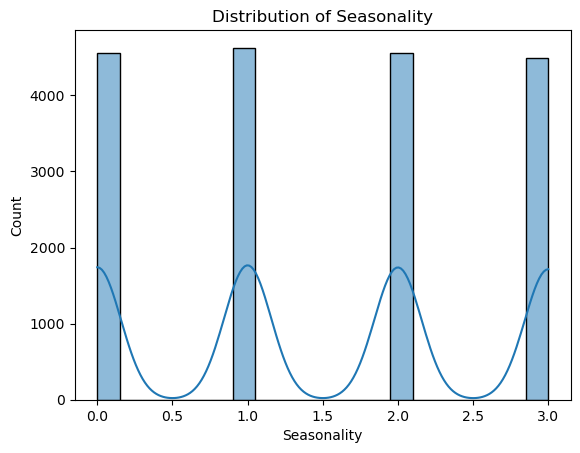

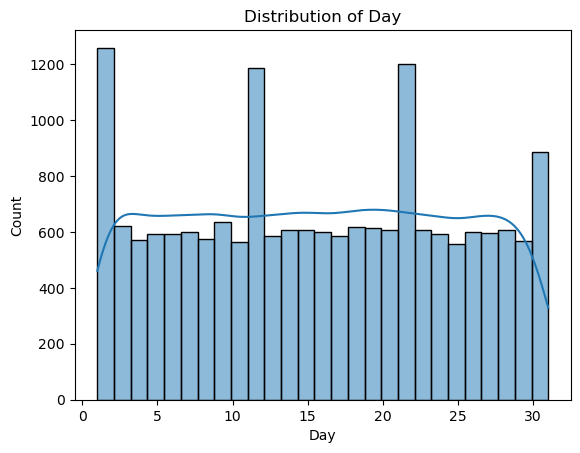

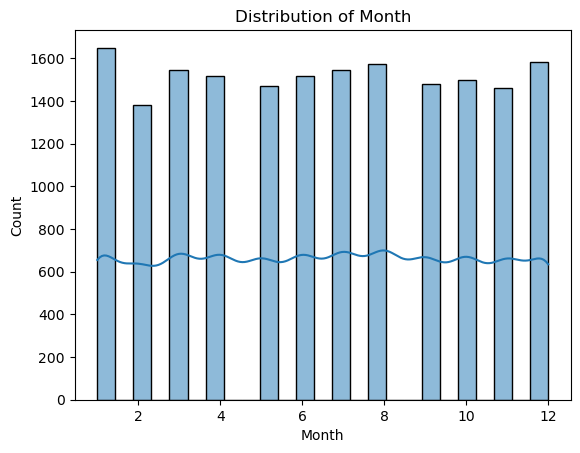

In [42]:
# Exploratory Data Analysis (EDA)

# Plotting distributions of numerical column
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

<Figure size 2000x600 with 0 Axes>

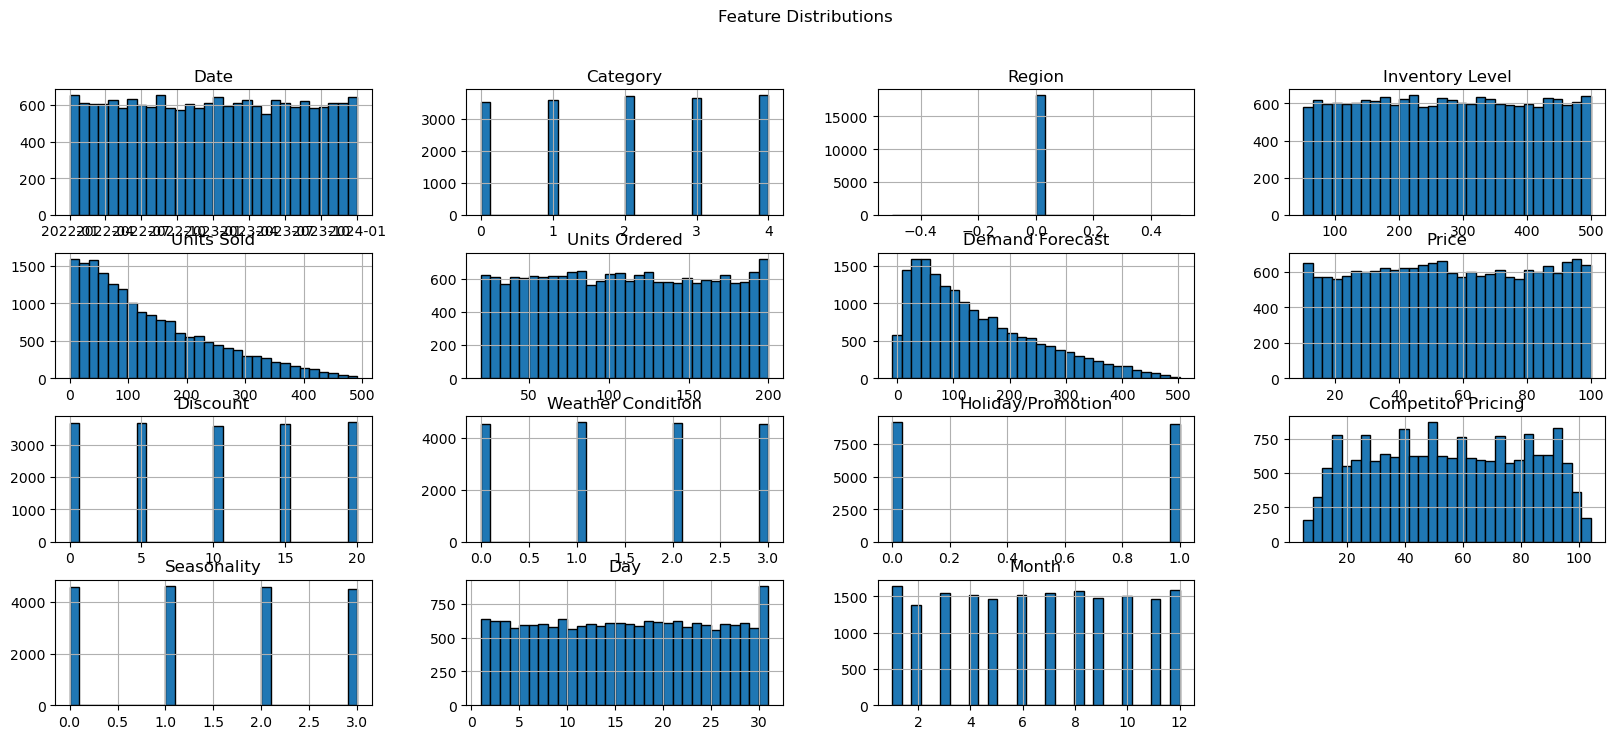

In [43]:
#EDA:Visualizing Data Distributions
plt.figure(figsize=(20,6))
df.hist(bins=30,figsize=(20,8),edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

#### ☝️this shows us each variable's that spreads a data across different value range 

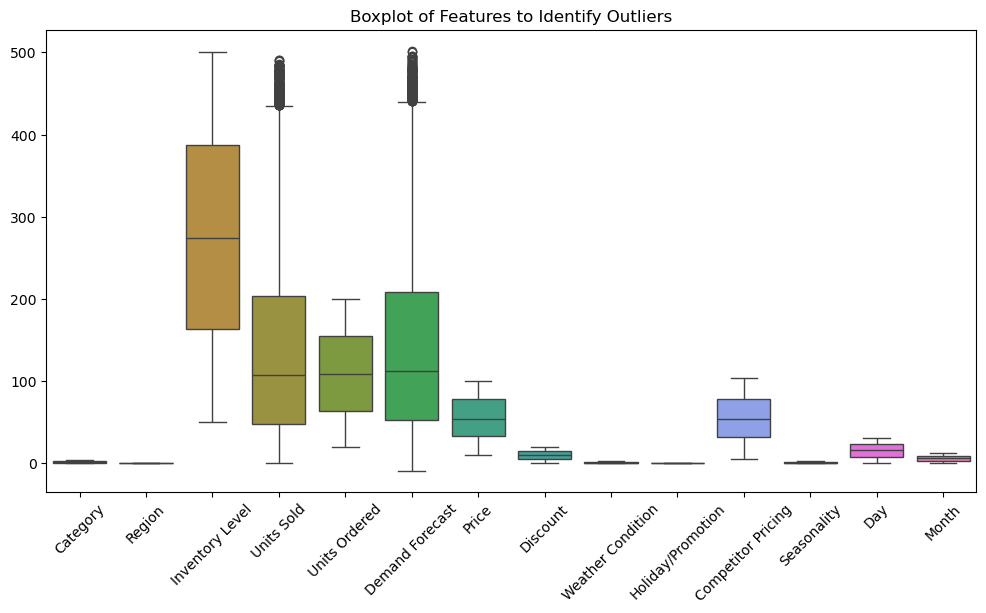

In [45]:
#finding outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of Features to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

### ☝️Boxplot is used to spread the data and detect outliers in a dataset and It helps us to find the extreme values.
- Here, *Units_sold* and *Demand_Forecast* having the outliers

In [47]:
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = df[(df['Units Sold'] < lower_bound) | (df['Units Sold'] > upper_bound)]

In [48]:
Q1 = df['Demand Forecast'].quantile(0.25)
Q3 = df['Demand Forecast'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliersDF = df[(df['Demand Forecast'] < lower_bound) | (df['Demand Forecast'] > upper_bound)]

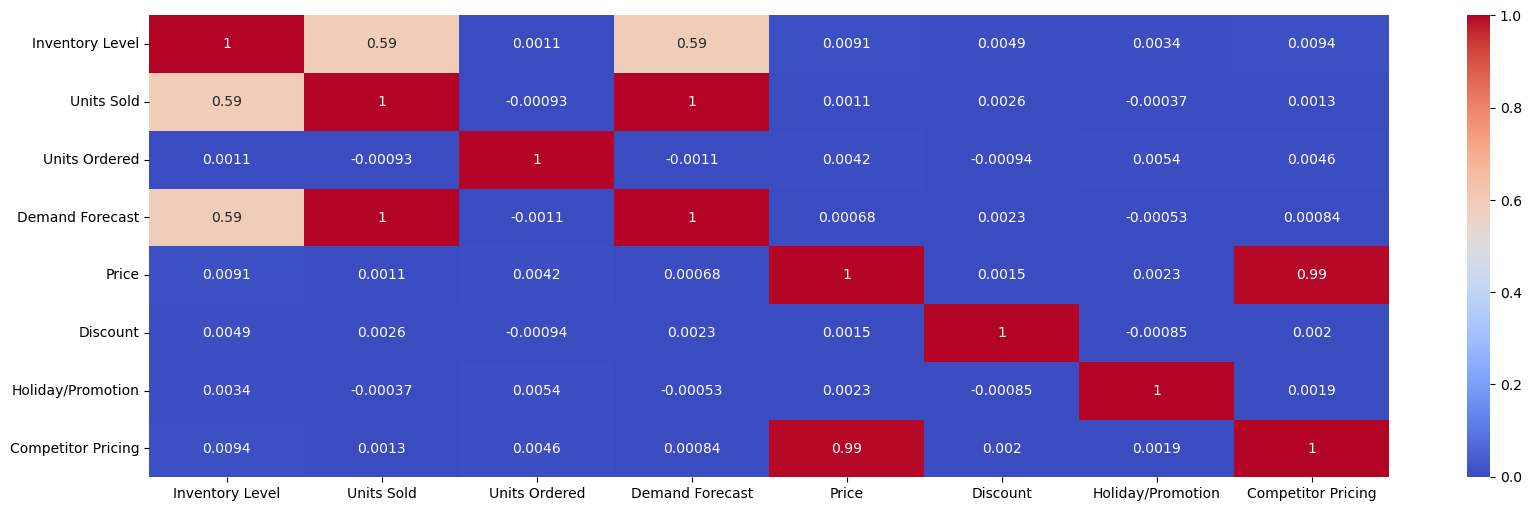

In [53]:
#Correlation Matrix
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize = (20,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()

☝️ Correlation matrix helps us to find the most target variable and it shows the high relationship between variables in positive or negative ranges which is useful for predictation, and it detect multicollinearity features.

- +1 = Perfect positive correlation
- -1 = Perfect negative correlation
- 0 = No linear relationship

## 📊 Univariate and Multivariate Analysis

### 🔹Univariate Analysis.

Univariate Analysis is a type of data visualization where we visualize only a single variable at 
a tie. It makes us to understand the distribution, central tendency, and spread of single variable in your data set. 

### 🔹 Multivariate Analysis
Multivariate analysis is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them. It helps us to understand how multiple factors interact and influence each other in a dataset.
.

We’ll explore both types of analysis using visualizations and summary statistics for key columns li `Units Sold`, `Price`, `Discount`, `DemandForecasting`, and `Weather Condition`.
.


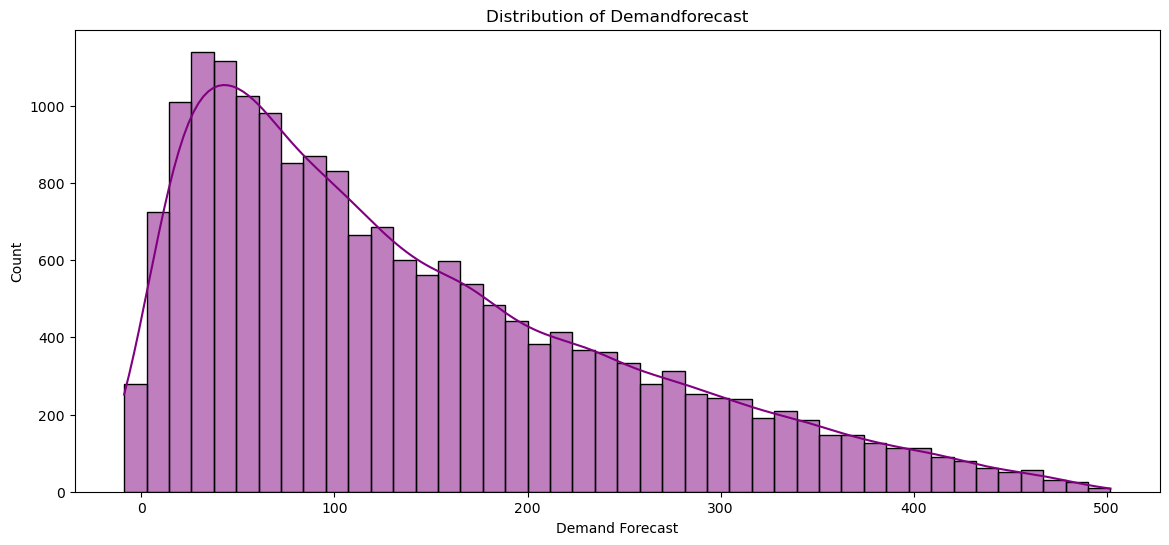

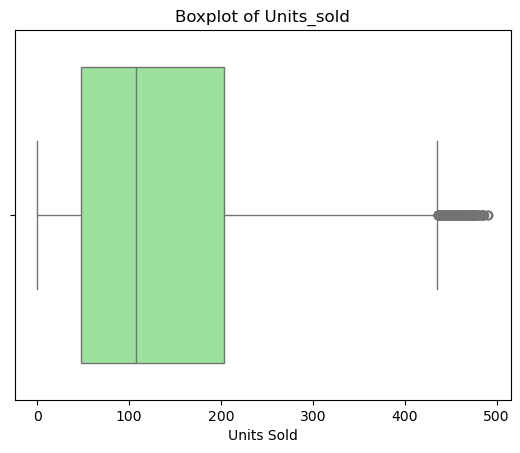

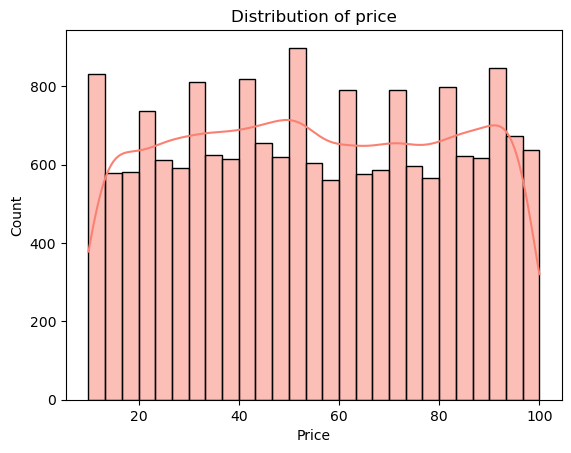

In [56]:
# Univariate Analysis - Distribution plots for numeric variables
plt.figure(figsize=(14, 6))
sns.histplot(df['Demand Forecast'], kde=True, color='purple')
plt.title('Distribution of Demandforecast')
plt.show()

sns.boxplot(x=df['Units Sold'], color='lightgreen')
plt.title('Boxplot of Units_sold')
plt.show()

sns.histplot(df['Price'], kde=True, color='salmon')
plt.title('Distribution of price')
plt.show()

### Univariate Analysis - 📐Categorical variable count plot

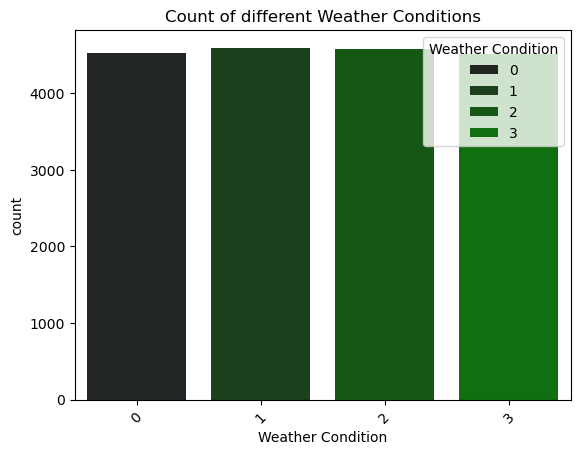

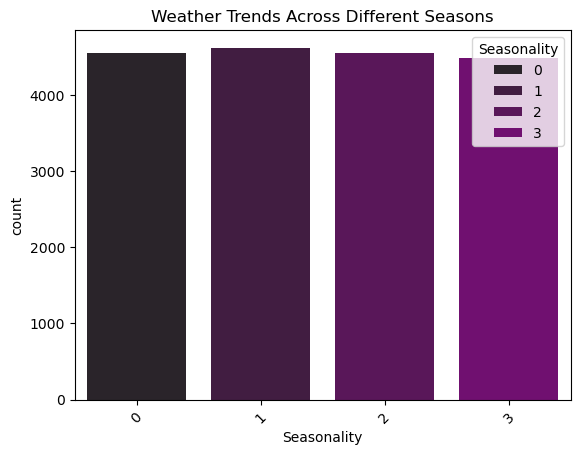

In [58]:
# Univariate Analysis - Categorical variable count plot
sns.countplot(x='Weather Condition', hue='Weather Condition',data=df,palette="dark:green")
plt.title('Count of different Weather Conditions')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Seasonality', hue='Seasonality',data=df,palette="dark:purple")
plt.title('Weather Trends Across Different Seasons')
plt.xticks(rotation=45)
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18228 entries, 0 to 73096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                18228 non-null  datetime64[ns]
 1   Category            18228 non-null  int32         
 2   Region              18228 non-null  int32         
 3   Inventory Level     18228 non-null  int64         
 4   Units Sold          18228 non-null  int64         
 5   Units Ordered       18228 non-null  int64         
 6   Demand Forecast     18228 non-null  int32         
 7   Price               18228 non-null  int32         
 8   Discount            18228 non-null  int64         
 9   Weather Condition   18228 non-null  int32         
 10  Holiday/Promotion   18228 non-null  int64         
 11  Competitor Pricing  18228 non-null  int32         
 12  Seasonality         18228 non-null  int32         
 13  Day                 18228 non-null  int32         


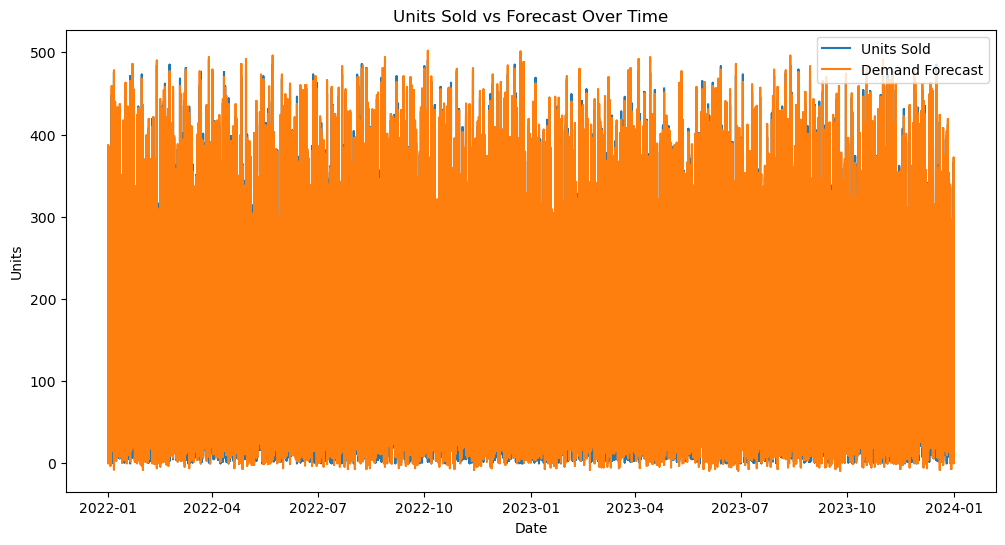

In [75]:
#line plot
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Units Sold'], label='Units Sold')
plt.plot(df['Date'], df['Demand Forecast'], label='Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Units')
plt.title('Units Sold vs Forecast Over Time')
plt.legend()
plt.show()

##### ☝️Line plot shows us how variable changes over time:
- Shows Units sold overtime
- Show us that if the demand forecast line is close to the unit's sold line, it means your demand forecast are on point

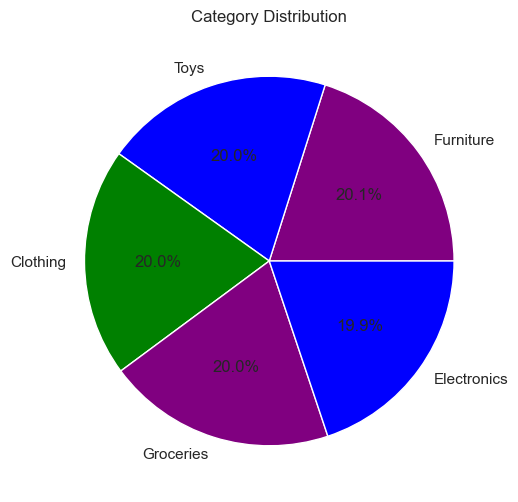

In [172]:
#pie chart
categorical = dataset['Category'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(categorical, labels=categorical.index, autopct='%1.1f%%',colors=['purple', 'blue', 'green'])
plt.title("Category Distribution")
plt.show()

##### ☝️ Piechat shows has that how much each product category contributes to the whole dataset like:
- Which category sells more.
- Which one to promote.
- Where to focus inventory.

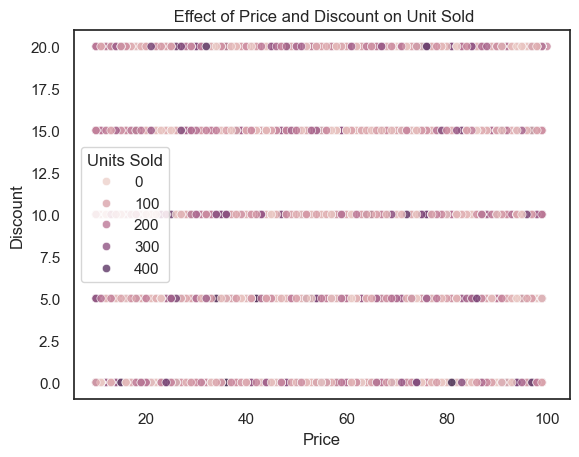

In [185]:
sns.scatterplot(x="Price",y="Discount",hue="Units Sold",data=df,alpha=0.8)
plt.xlabel('Price')
plt.ylabel('Discount')
plt.title(' Effect of Price and Discount on Unit Sold')
plt.show()

##### ☝️ Scatterplot shows us the relationship between variables and also to find outliers.
- Show a negative or positive trend between Price and Unit Sold.
- Help us to make business decision, while we notice a Discount increases and Units Sold increases.

## Multivariate Analysis - 🌀Pairplot of key numeric features

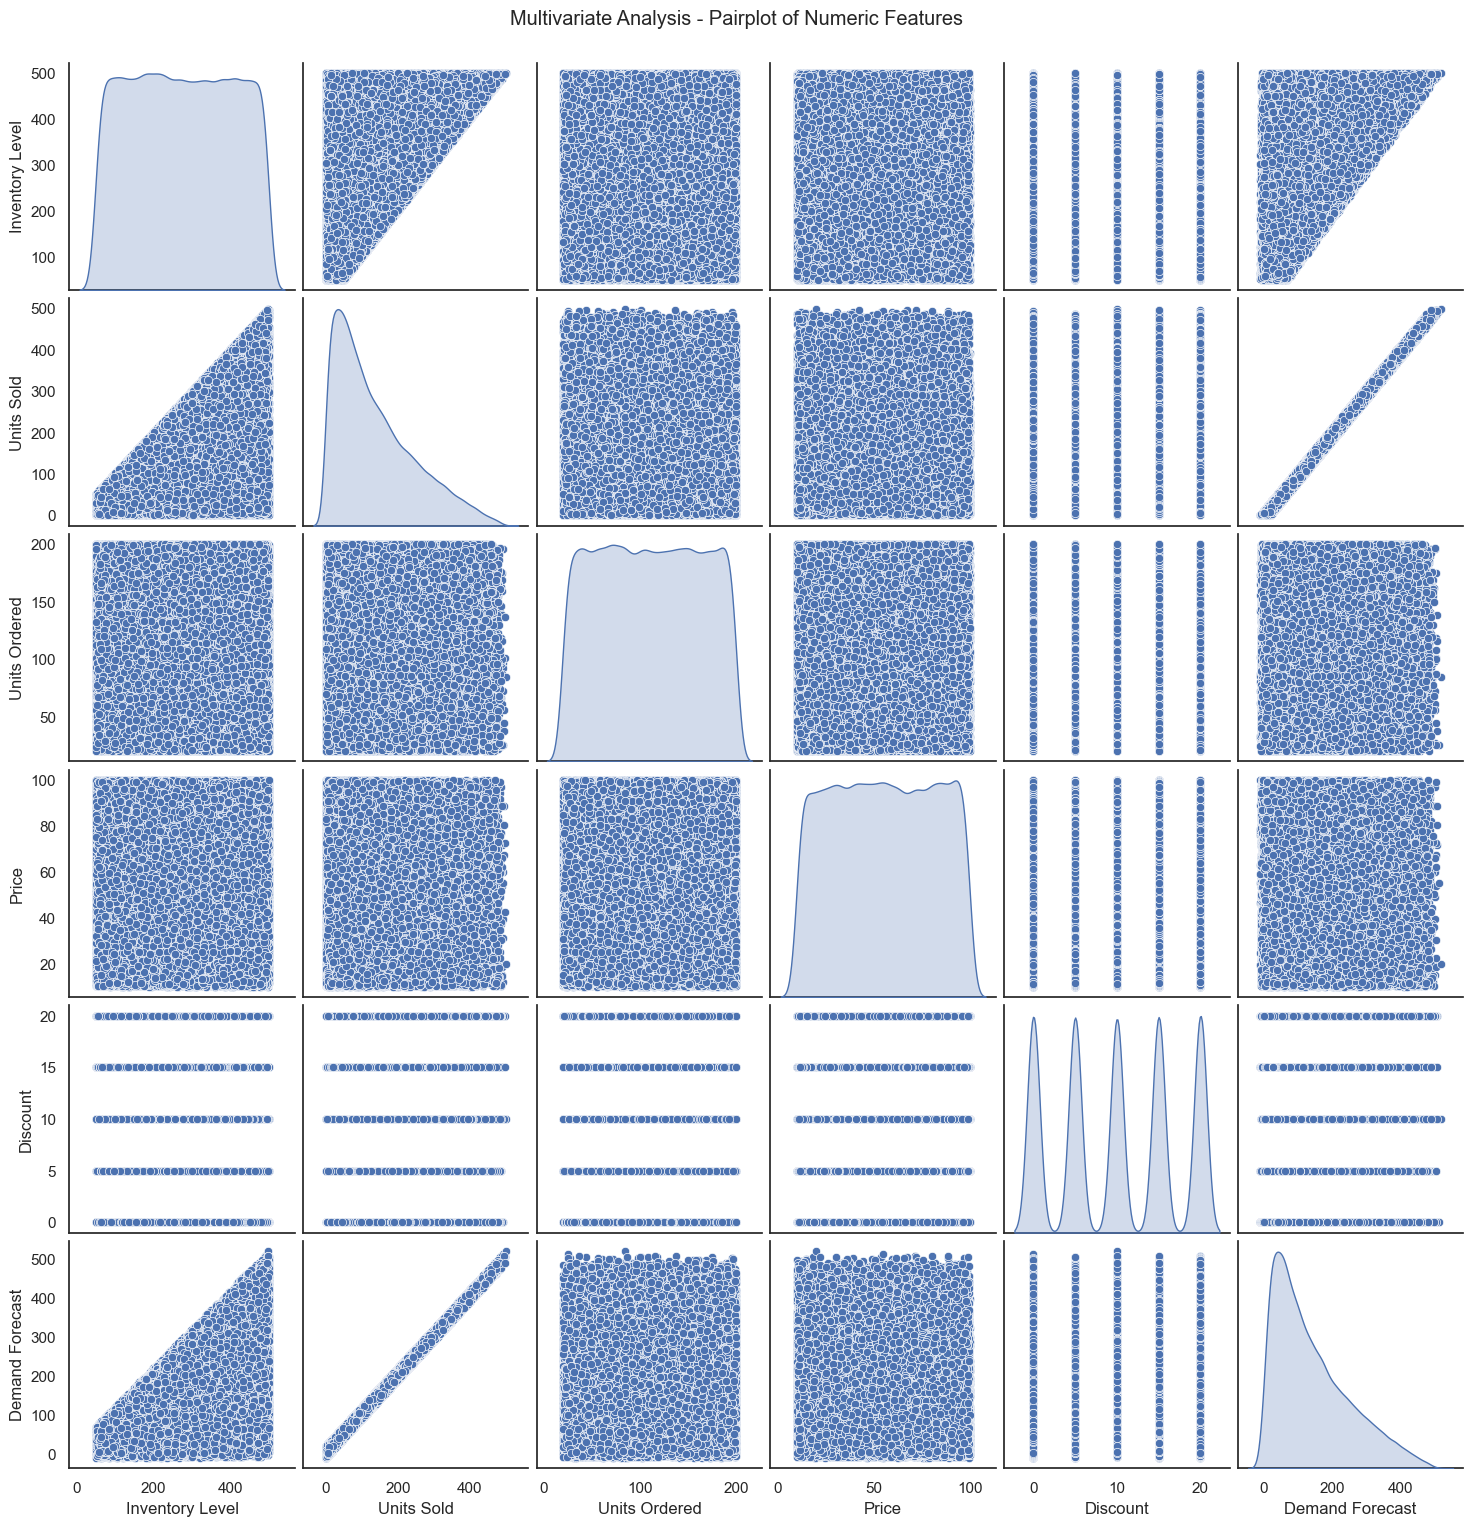

In [107]:
# Multivariate Analysis - Pairplot of key numeric features
sns.pairplot(dataset[['Inventory Level', 'Units Sold', 'Units Ordered', 'Price','Discount','Demand Forecast']], diag_kind='kde')
plt.suptitle('Multivariate Analysis - Pairplot of Numeric Features', y=1.02)
plt.show()

##### ☝️ Pair plot is used to Create scatter plots between every pair of numerical features.
- **pairplot** : [Inventory Level , Units Sold , Units Ordered , Price , Discount , Demand Forecast]

## Multivariate Analysis - 🔥Heatmap for correlation

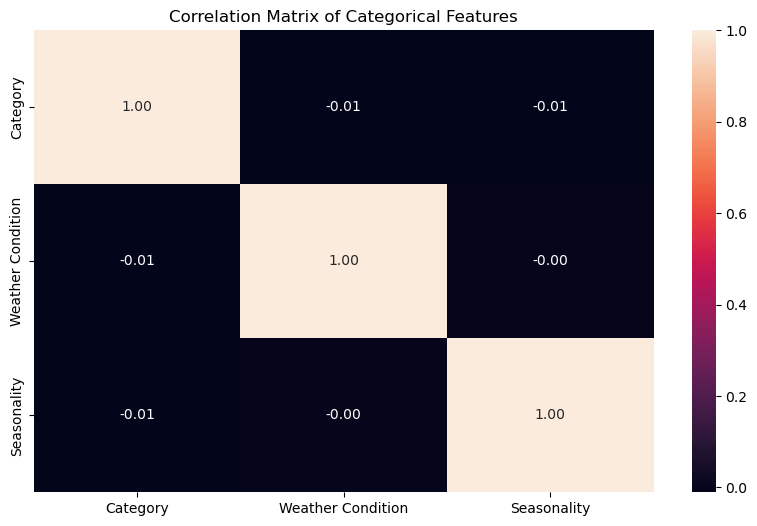

In [84]:
# Multivariate Analysis - Heatmap for correlation
plt.figure(figsize=(10, 6))
corr = df[['Category',  'Weather Condition', 'Seasonality']].corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Categorical Features')
plt.show()

##### ☝This heatmap is meaningful only if categorical variables are converted into numerical variables.

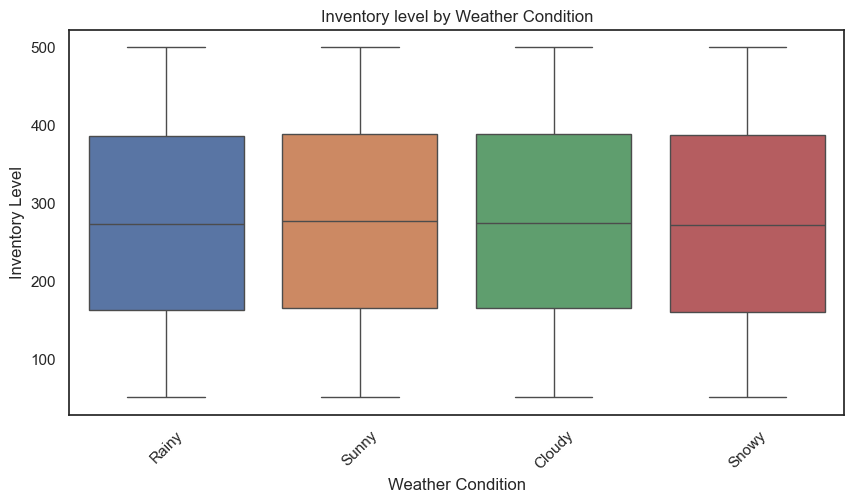

In [109]:
# Multivariate Analysis - Boxplot of Inventory level by Weather Condition (numerical and categorical)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Weather Condition', y='Inventory Level', data=dataset, hue="Weather Condition")
plt.title('Inventory level by Weather Condition')
plt.xticks(rotation=45)
plt.show()

##### ☝️ Boxplot Points to the outliers and easy to understand central tendency and spread of data.
- Helps to compare how inventory level vary with different weather conditions.
- it is useful for identifying inconsistencies in stock levels based on demand forecasting.

## 🎲 Probability & Hypothesis Testing

Here, we:
- Fit distributions (e.g., normalized and log Transfrom) to numerical variables
- Perform hypothesis tests like t-tests and Chi-square tests

## 🧮Probability Distribution Analysis

By analysing histogram, KDE(Kernel density estimation)plots and normal distribution. We gain insights into the behaviour of important numerical metrics in the retail inventory dataset

### 🔖Columns Chosen:
- **Inventory Level** – Tracks stock availability.
- **Units Sold** – Measures sales performance.
- **Demand Forecast** – Informs promotions and pricing.
- **Price** – Interacts with units sold and inventory level.
- **Discount** – Clears excess inventory.

Each variable is visualized below with both histogram and normal distribution fit.


In [88]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, ttest_ind, chi2_contingency

In [89]:
# Set the style for all plots
sns.set(style="white")

# Columns selected for probability distribution
columns_to_examine = ['Inventory Level','Units Sold','Demand Forecast','Price','Discount']
columns_to_examine

['Inventory Level', 'Units Sold', 'Demand Forecast', 'Price', 'Discount']

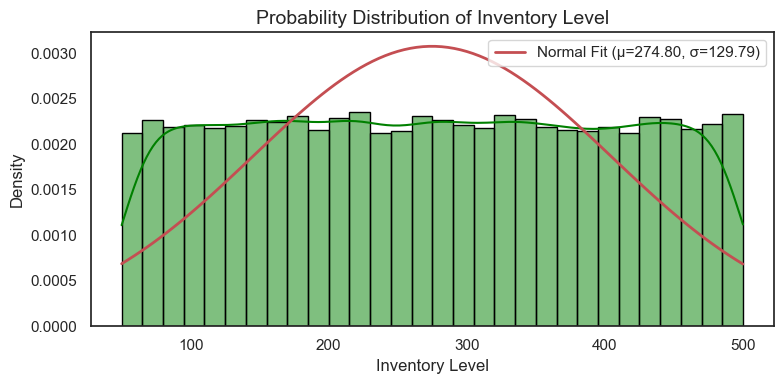

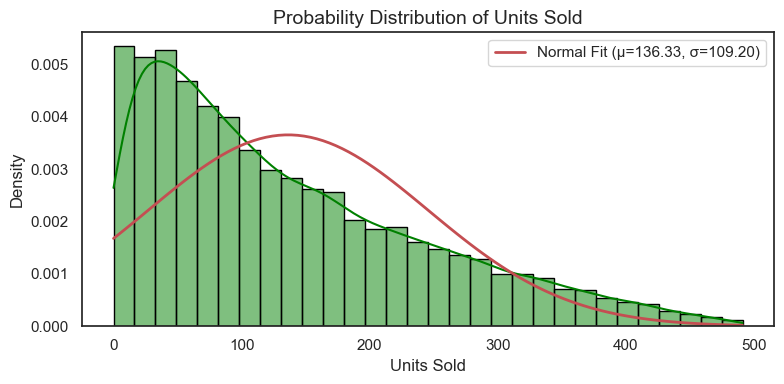

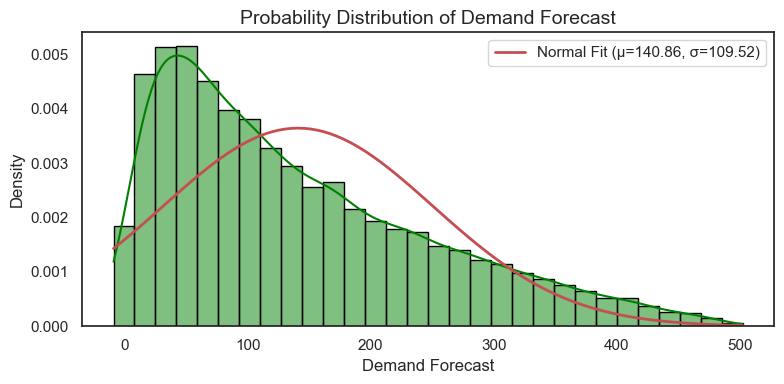

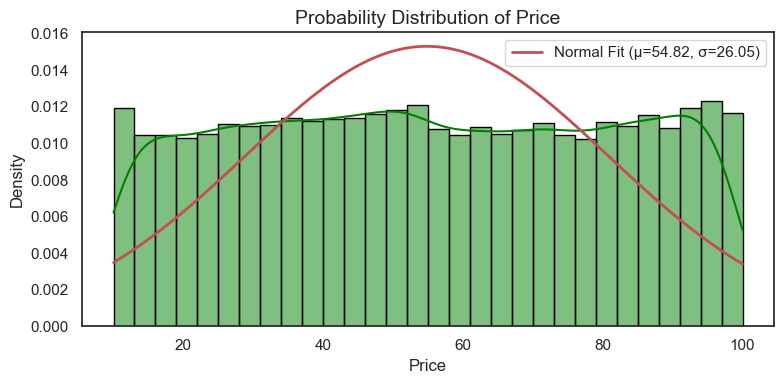

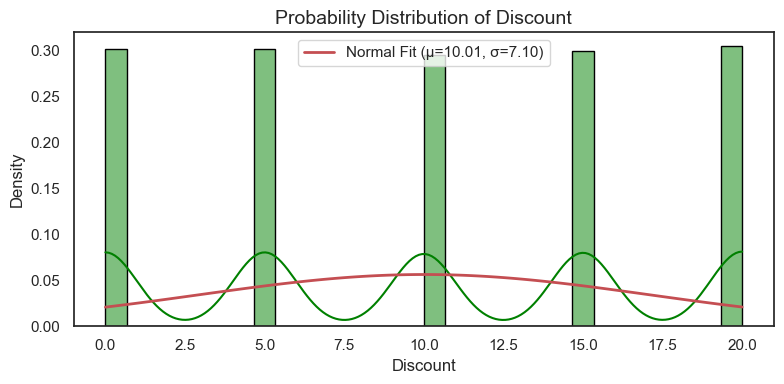

In [90]:
# Plotting histogram with KDE and normal distribution fit
for col in columns_to_examine:
    plt.figure(figsize=(8, 4)) 
    # Plot histogram and KDE
    sns.histplot(df[col], kde=True, stat="density", bins=30, color="green", edgecolor="black")
    # Fit normal distribution to the data
    mean, std = norm.fit(df[col])
    #linspace is based on numbers of points(start, stop, num)
    x = np.linspace(df[col].min(), df[col].max(), 100)
    p = norm.pdf(x, mean, std)
    # Plot fitted normal distribution
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Fit (μ={mean:.2f}, σ={std:.2f})')
    # Titles and labels
    plt.title(f'Probability Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 📝Hypothesis Testing
   by doing t-Test, chi-square test that helps us to make data-driven decisions by Statistically evaluating patterns assumptions and differences in data.

In [92]:
# Hypothesis Testing
# Choose two groups: with and without discount


T-Statistic: -1.12
P-Value: 0.2635
Fail to Reject Null Hypothesis: No significant differences.


## Simple Linear Regression
We predict `Discount` using `Units Sold` to understand how discount affects on sales Performance.


In [94]:
#Simple Linear Regression (Example)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Independent (X) and dependent (y) variables
X = df[['Discount']]  # must be 2D for sklearn
y = df['Units Sold']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [95]:
# Predict values
y_pred = model.predict(X)
y_pred

array([135.47189209, 136.32808102, 136.75617549, ..., 136.32808102,
       137.18426996, 136.32808102])

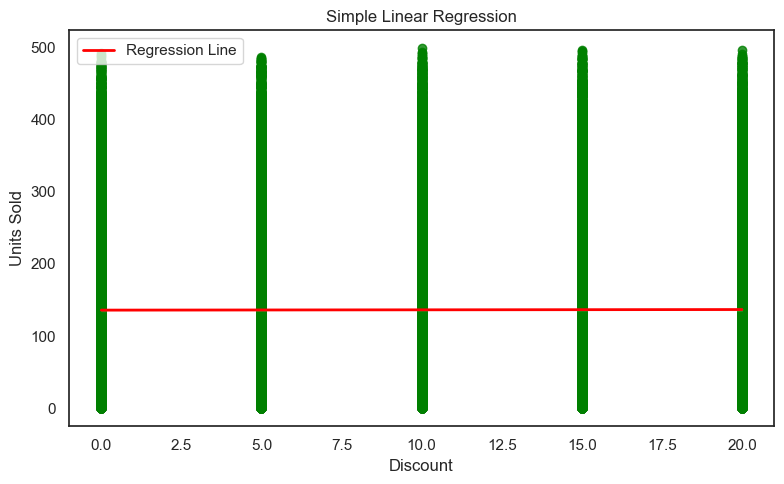

In [96]:
# Plotting Regression Line (using regplot)
plt.figure(figsize=(8, 5))
sns.regplot(x='Discount', y='Units Sold', data=dataset, scatter_kws={'color': 'green', 'label': 'Actual'}, line_kws={'color': 'red', 'linewidth': 2, 'label': 'Regression Line'})
plt.xlabel('Discount')
plt.ylabel('Units Sold')
plt.title('Simple Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
# Display coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 137.18426995574586
Slope: -0.08561889313758946


## Multiple Linear Regression
We now use three variables to predict `Units Sold` to improve our prediction accuracy and capture more in sales perfromance.


In [117]:
#Multiple Linear Regression (Example)
# Define features and target
variables = ['Discount','Price','Inventory Level']
X = df[variables]
y = df['Units Sold']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model_mul = LinearRegression()
model_mul.fit(X_train, y_train)

LinearRegression()

In [119]:
# Predict
y_pred = model_mul.predict(X_test)
y_pred

array([182.48248913, 193.54697768, 191.59314509, ..., 195.73567951,
        46.2419043 , 100.32985093])

In [121]:
# Evaluation metrics
print("Intercept:", model_mul.intercept_)
print("Coefficients:", dict(zip(variables, model_mul.coef_)))
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: 3.509572916822748
Coefficients: {'Discount': -0.15613719714427818, 'Price': -0.019956725662204154, 'Inventory Level': 0.49361919788313524}
R-squared: 0.34925086481126766
RMSE: 87.95027211686714


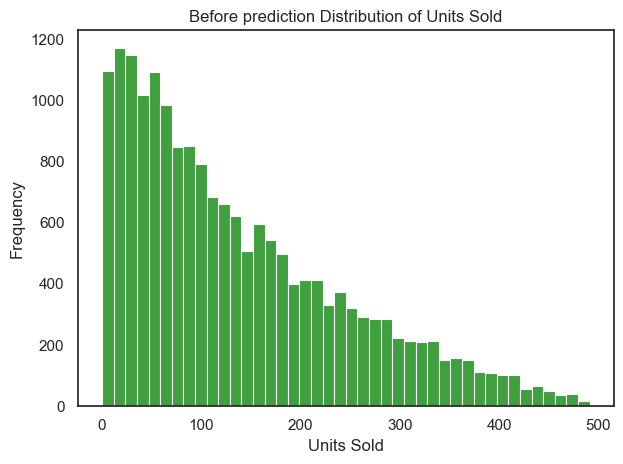

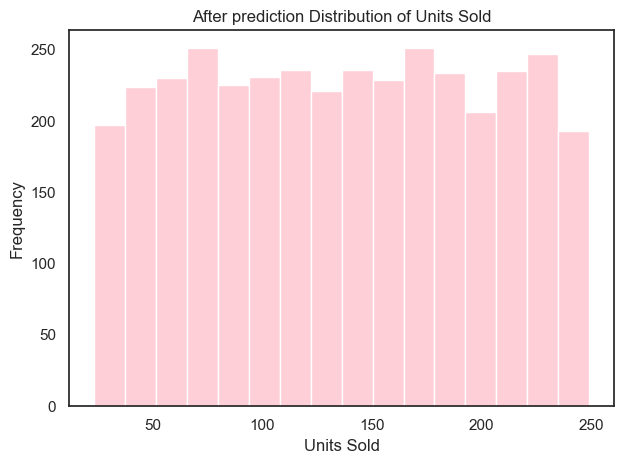

In [123]:
sns.histplot(df["Units Sold"],color="green")
plt.title("Before prediction Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

sns.histplot(y_pred,color="pink")
plt.title("After prediction Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## 📌Hypothesis Testing
We perform a t-test to see if there's a significant difference in the `Units Sold` of retail inventory from disount

In [146]:
import statsmodels.api as sm
y = df['Units Sold']
X = df[['Discount','Price','Inventory Level']]
# Fit the model
model = sm.OLS(y, X).fit()
# Extract overall model F-statistic and p-value
f_stat = model.fvalue
f_pval = model.f_pvalue
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {f_pval:.4e}")
if f_pval < 0.05:
    print("=> Reject H₀: The model is statistically significant.")
else:
    print("=> Fail to reject H₀: The model is NOT statistically significant.")

F-statistic: 17655.7884
p-value: 0.0000e+00
=> Reject H₀: The model is statistically significant.


## 📏 Model Evaluation

We evaluated the models using the following techniques:

- **R-squared**: Measures how well the regression model explains the variation in the dependent variable.
- **P-values**: Determines the statistical significance of each predictor.

### 🔹 Interpretation:
- The **Simple linear and multiple regression models** revealed how `Discount`, `Price`, and `Inventory level` impact `Units Sold`.






## 🔰Final Conclusion

In this project, **Data-Driven Insights into Retail Inventory and Sales Performance Using Statistical Analysis** This explores a comprehensive statistical analysis of a retail store inventory to uncover a key insights into sales performance and inventory dynamics.

### 📍Core Insights:

- **Descriptive statistics** It helps us to understand the retail inventory and sales by summarising and organising a large data set into meaningful information. It offers a clear snapshot of sales behaviour.
- **Probability distributions** Applying normalisation and Distributions(hist) were explored on selected columns like `Discount` and `Units Sold`, revealing distribution tendencies useful for modeling.
- **Simple & Multiple Linear Regression** models demonstrated that `Discount`, `Price`, and `Inventory level` significantly contribute to predicting sales Performance`Units Sold`, with respectable R-squared values.
- **Hypothesis testing** It confirmed that discounts have a statistical significant impact on units sold, making them a powerful lever in driving demand
- **Correlation analysis** It was conducted on numerical variables like `Discount`, `Price`, `Inventory level`,`Units Sold`, and `Demand Forecast` To identify meaningful relationship To support data driven decision Making. Avoid multicollinearity in regression and make bettter decisions in princing, demandforecasting, and promotions.

### 📈 Execution decision:

- **Discount** Have a positive impact on sales, confirming there are an effective strategy to boost demand.
- **Price and Inventory level** Showing that optimising pricing strategy and maintaining sufficient stock levels can influence sales performance.
- **Demandforecast** allows retail manager to proactively adjust inventory levels to avoid shortages and excess stock.
- **Units sold** Understanding sales trends allows manager to plan effectively for BC periods and tailor marketing efforts to boost sales It also adjust pricing strategies to maximize revenue.
  
By applying statistical analysis to this data, the business came to raw numbers into action about strategies that increases the sales and ehancing customer experience.focus on customer behavior, product availability, localized marketing strategies.



### ✅ Final verdict:

This analysis Offers strong potential for statistical analysing enabling insights into **Sales trends** , **Inventory optimization** , and **pricing strategies** With a blend of exploratory and predictive analysis, this project empowers busniess to make informed strategic decision in retail management and ehnace Customer loyalty- Unlimitely driving long term growth and success


